In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Аппроксимация

Начальное изображение

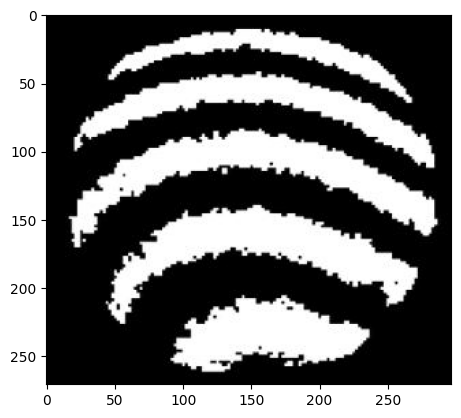

In [87]:
im = plt.imread('pic1.png')

plt.imshow(im)
plt.show()

Вспомогательные функции

In [88]:
def is_black(rgba):
  return rgba[0] == rgba[1] == rgba[2] == 0

def is_white(rgba):
  return rgba[0] == rgba[1] == rgba[2] == 1

Нужно почистить изображение

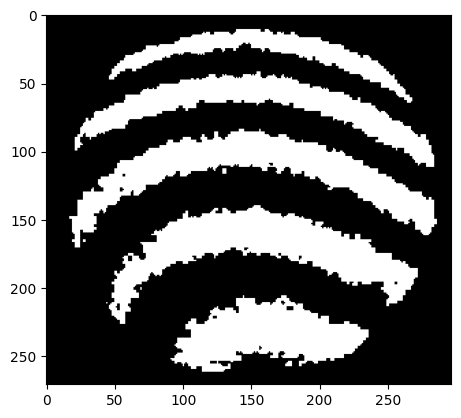

In [89]:
im2 = np.copy(im)

for y in range(len(im2)):
  for x in range(len(im2[0])):
    current = im2[y][x]
    if not is_black(current) and not is_white(current):
      current_sum = sum(current)
      im2[y][x] = [0, 0, 0, 1] if current_sum < 3 else [1, 1, 1, 1]

plt.imshow(im2)
plt.show()

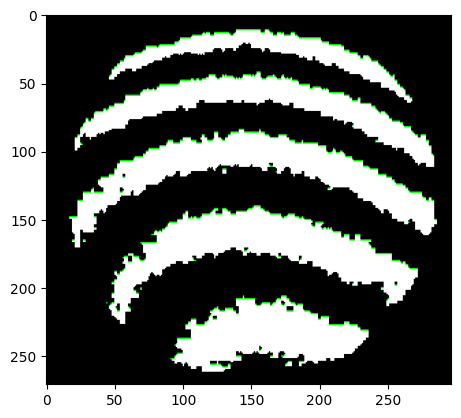

In [90]:
im3 = np.copy(im2)

curves_points = []

for y in range(len(im3)):
  for x in range(len(im3[0])):
    is_prev_black = False if y == 0 else is_black(im3[y - 1][x])
    is_curr_white = is_white(im3[y][x])

    if is_prev_black and is_curr_white:
      im3[y][x] = [0, 1, 0, 1]
      curves_points.append([x, y])

plt.imshow(im3)
plt.show()

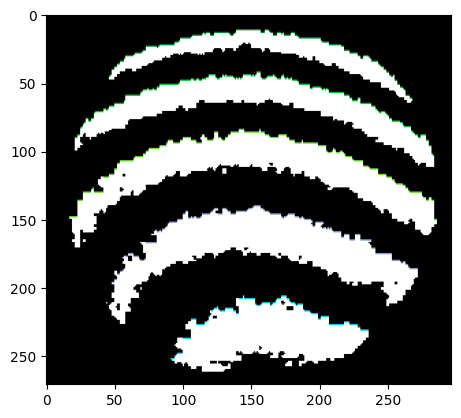

In [91]:
x_sorted_curves_points = sorted(curves_points, key=lambda p: p[0])

def get_curve():
  fp = x_sorted_curves_points.pop(0)

  curve = [fp]

  if len(x_sorted_curves_points) == 0:
    return curve

  p = min(x_sorted_curves_points, key=lambda point: math.dist(point, fp))
  dist = math.dist(p, fp)

  #
  # настроить макисмальное растояние
  #
  while dist < 15:
    curve.append(p)
    x_sorted_curves_points.remove(p)

    x_closest = list(filter(lambda point: point[0] - curve[-1][0] == 1, x_sorted_curves_points))

    if len(x_closest) == 0:
      break

    p = min(x_closest, key=lambda point: math.dist(point, curve[-1]))
    dist = math.dist(p, curve[-1])
  
  return curve

im4 = np.copy(im2)

while len(x_sorted_curves_points) > 0:
  curve = get_curve()

  #
  # настроить минимальную длину
  #
  if len(curve) < 10:
    continue

  color = np.append(np.random.uniform(0, 1, [3]), [1])
  for p in curve:
    im4[p[1]][p[0]] = color

plt.imshow(im4)
plt.show()